# Project: TMDb investigation

>## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
># Introduction

>## The dataset selected is the TMDb dataset that contains the data on movies and ratings.

>**Trends to be explored here are:**
<ul>
<li>Genres over the years
<li>Revenue over the years
<li>Runtime over the years
<li>Associations and Effects `over period spans` to be evaluated are:
    <ul>
    <li>Runtime vs Popularity
    <li>Runtime vs Vote Average
    <li>Revenue vs Popularity

</ul>

In [1]:
# Import statements for all of the packages that we gonna used for the following cells
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
># Data Wrangling

> **The data is relatively good since it doesn't contain so many null values and duplicates but there are a couple of infromation that is stated in columns that we don't need and i am goona drop these columns in Data Cleaning section**

>## General Properties

>### Observations:   
<ul>
<li> I can observe a duplicate row existed in the dataset
<li>There are already columns that contain null values such as 
        <ul>
            <li>imdb_id
            <li>cast
            <li>homepage
            <li>director
            <li>tagline
            <li>keywords
            <li>overview
            <li>genres
            <li>production_companies
        <ul>
<ul>

In [2]:
# Load your data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# The shape of the database
df.shape

(10866, 21)

In [4]:
##Now it is time to discuss the structure of the data to find if it is cleaned or not by three steps
#1. Showing if there some columns contain null values or not,and if there is
#which column contains null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>### Data Cleaning (Removing unneeded columns in addition to duplicated/NaN rows!)

>### Steps Taken:
<ul>
    <li> Removing duplicated row to better analysis
    <li> Deleting all the rows that contain null values to handle the data well without poping up errors
    <li> Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters so i . am gonna clean them up by removing the spaces between the words and replacing (|) by (,)
<ul>
    



In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#imdb_id
columns_deleted=['homepage','tagline','overview','keywords','release_date','imdb_id','production_companies','director']
df.drop(columns_deleted,axis=1,inplace= True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.1+ MB


##### **Here we can detect the number of rows contained NaN are decreased because we already removed unneeded columns; Now , NaN variables are in cast and genres. Cast won't affect our analysis but genres might affect it but we cannot replace these NaN  with any values since they are qualtative values not quantative one** 

In [7]:
#How many duplicated data do we have?
df.duplicated().sum()

1

In [8]:
#Getting the duplicated rows
df[df.duplicated(['id'], keep=False)]

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,92,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010,30000000.0,967000.0
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,92,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010,30000000.0,967000.0


In [9]:
#Dropping duplicated values
df.drop_duplicates(inplace=True)

In [10]:
#Dropping rows contained NaN
df.dropna(axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
#making sure that everthing is going in the right way
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [12]:
df['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

In [13]:
#In earlier cell, we can see what i stated before so i replace the space between words by - and | by ,
#to handle the Genres column easily
df['genres']=df['genres'].apply(lambda x :x.replace(' ','-'))
df['genres']=df['genres'].apply(lambda x :x.replace('|',','))
df['genres'].head()

0    Action,Adventure,Science-Fiction,Thriller
1    Action,Adventure,Science-Fiction,Thriller
2           Adventure,Science-Fiction,Thriller
3     Action,Adventure,Science-Fiction,Fantasy
4                        Action,Crime,Thriller
Name: genres, dtype: object

In [14]:
#Doing the same to Cast
df['cast']=df['cast'].apply(lambda x :x.replace(' ','-'))
df['cast']=df['cast'].apply(lambda x :x.replace('|',','))
df['cast'].head()

0    Chris-Pratt,Bryce-Dallas-Howard,Irrfan-Khan,Vi...
1    Tom-Hardy,Charlize-Theron,Hugh-Keays-Byrne,Nic...
2    Shailene-Woodley,Theo-James,Kate-Winslet,Ansel...
3    Harrison-Ford,Mark-Hamill,Carrie-Fisher,Adam-D...
4    Vin-Diesel,Paul-Walker,Jason-Statham,Michelle-...
Name: cast, dtype: object

In [15]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10767.000000,10767.000000,1.076700e+04,1.076700e+04,10767.000000,10767.000000,10767.000000,10767.000000,1.076700e+04,1.076700e+04
mean,65477.144144,0.650924,1.475532e+07,4.018610e+07,102.413393,219.137364,5.967549,2001.283459,1.770705e+07,5.183338e+07
std,91703.303390,1.003565,3.102387e+07,1.174783e+08,30.906009,577.964702,0.931426,12.815909,3.442339e+07,1.452125e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10559.500000,0.209957,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20423.000000,0.386062,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,74507.500000,0.719253,1.600000e+07,2.476490e+07,112.000000,147.000000,6.600000,2011.000000,2.103337e+07,3.432264e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


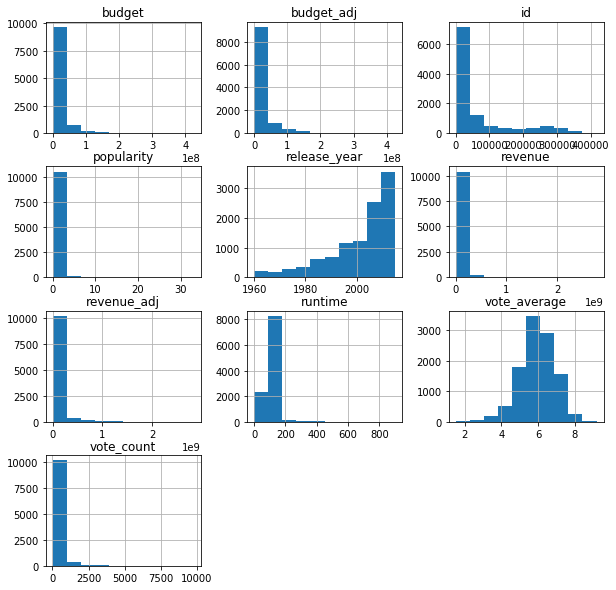

In [16]:
df.hist(figsize=(10,10));

<a id='eda'></a>
># Exploratory Data Analysis
> **Follow Up: Now that I've trimmed and cleaned my data, it is time to move on to exploration. Compute statistics and create visualizations with data to get the most out of it to have better generations of movies**

>### I have asked two research questions that simplify the data well and in short hand way
><ul>
<li><a href="#q1">Research Question 1</a></li>
<li><a href="#q2">Research Question 2</a></li>
></ul>


<a id='q1'></a>
>>## Research question 1
<ul>
    <li> <a href="#genres_years">** what are the most common genres over years? ** </a>
    <li> <a href='#runtime_years'>** what is the trending runtime of movies over years **? </a>
    <li> <a href="#pop_factors">** what affect popularity ? **</a>
<ul>

<a id='genres_years' ></a>
>>## Genres over years

In [17]:
#Getting the genres column and put it into a new dataframe
genres_col=df[['original_title','genres']]
genres_df = pd.DataFrame(genres_col)
genres_df.head()


,original_title,genres
0,Jurassic World,"Action,Adventure,Science-Fiction,Thriller"
1,Mad Max: Fury Road,"Action,Adventure,Science-Fiction,Thriller"
2,Insurgent,"Adventure,Science-Fiction,Thriller"
3,Star Wars: The Force Awakens,"Action,Adventure,Science-Fiction,Fantasy"
4,Furious 7,"Action,Crime,Thriller"


In [18]:
# Spliting the genres of each film that could give us a better visulization of how genres are used over decads
s1 = genres_df.genres.str.split(',', expand=True).stack().reset_index(level=1,drop=True)
s2 = df['original_title']

genres_splitted_df  = pd.concat([s1,s2], axis=1, keys=['genres','original_title'])
genres_splitted_df.head(10)

,genres,original_title
0,Action,Jurassic World
0,Adventure,Jurassic World
0,Science-Fiction,Jurassic World
0,Thriller,Jurassic World
1,Action,Mad Max: Fury Road
1,Adventure,Mad Max: Fury Road
1,Science-Fiction,Mad Max: Fury Road
1,Thriller,Mad Max: Fury Road
2,Adventure,Insurgent
2,Science-Fiction,Insurgent


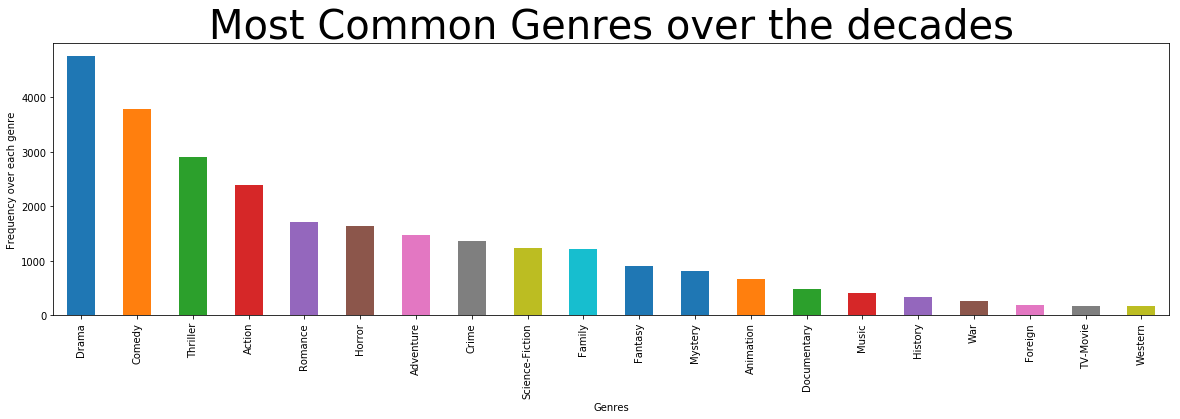

In [19]:
# Create a bar chart to see the distribuation
genres_splitted_df['genres'].value_counts().plot(kind='bar',figsize=(20,5))
plt.title('Most Common Genres over the decades',fontsize=40)
plt.xlabel('Genres',fontsize=10)
plt.ylabel('Frequency over each genre' ,fontsize=10)
plt.show();


**Follow Up**: We can get now that the Drama and Comedy are the most common genres over the films but how about the best combinations genres ? 



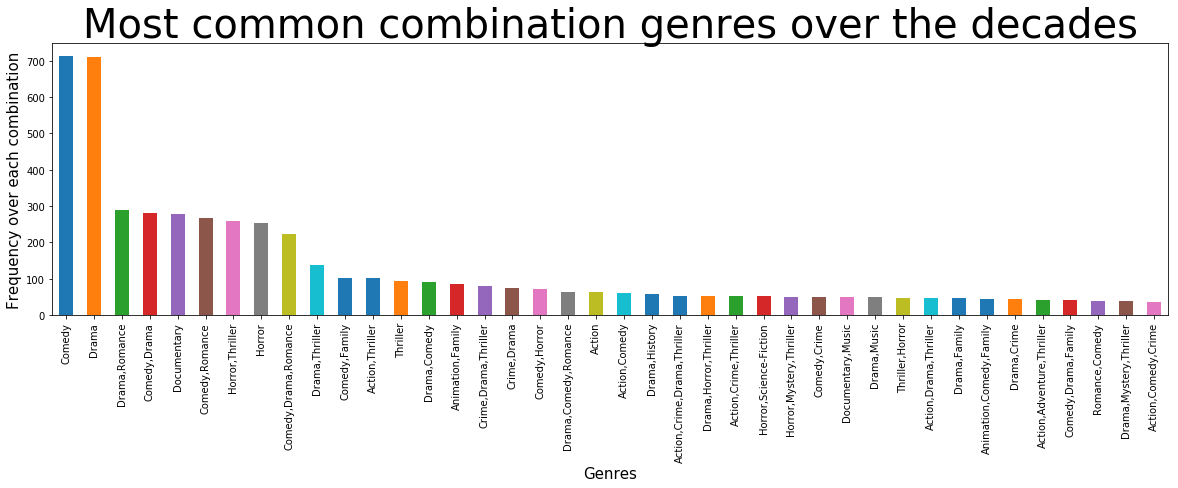

In [20]:
# Creating a bar chart to get out the top 40 genres combination 
# since they are too big we can't plot them all in one chart.
df['genres'].value_counts().head(40).plot(kind='bar',figsize=(20,5))
plt.title('Most common combination genres over the decades',fontsize=40)
plt.xlabel('Genres',fontsize=15)
plt.ylabel('Frequency over each combination' ,fontsize=15)
plt.show();

<a id='runtime_years' ></a>
>>## Runtime over years

In [21]:
# Getting the the mean of each column per year
df_year = df.groupby('release_year').mean()
df_year.head()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,
1960,15715.281250,0.458932,6.892796e+05,4.531406e+06,110.656250,77.531250,6.325000,5.082036e+06,3.340991e+07
1961,18657.000000,0.422827,1.488290e+06,1.089420e+07,119.419355,77.580645,6.374194,1.085687e+07,7.947167e+07
1962,17001.062500,0.454783,1.710066e+06,6.736870e+06,124.343750,74.750000,6.343750,1.232693e+07,4.856238e+07
1963,16556.000000,0.502706,2.156809e+06,5.511911e+06,111.323529,82.823529,6.329412,1.535687e+07,3.924580e+07
1964,17379.571429,0.412428,9.400753e+05,8.118614e+06,109.214286,74.690476,6.211905,6.608980e+06,5.707603e+07


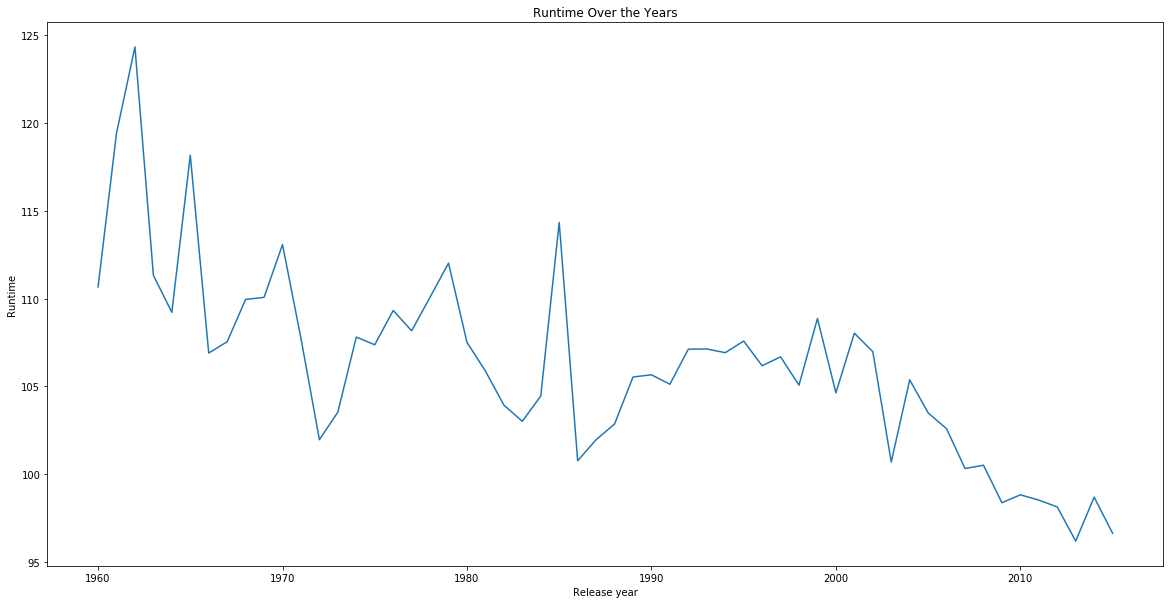

In [22]:
# The trending runtime of movies over time
df_year['runtime'].plot(figsize=(20,10))
plt.xlabel('Release year')
plt.ylabel('Runtime')
plt.title('Runtime Over the Years')
plt.show();

** We can conclude that the runtime over years are decreasing and the long runtime becomes something as old fashioned ! **

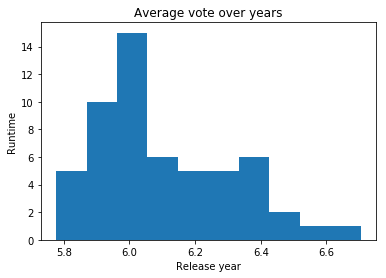

In [23]:
df_year['vote_average'].plot(kind='hist')
plt.xlabel('Release year')
plt.ylabel('Runtime')
plt.title('Average vote over years')
plt.show();

<a id='pop_factors' ></a>
>>## Popularity factors

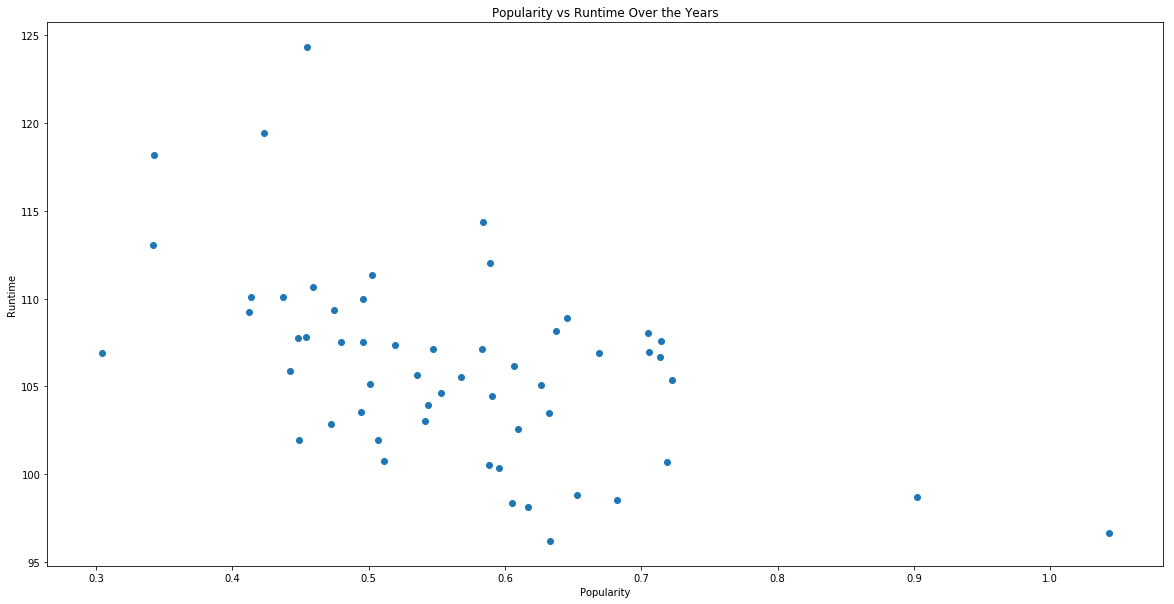

In [24]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(x=df_year['popularity'], y=df_year['runtime'])
plt.xlabel('Popularity')
plt.ylabel('Runtime')
plt.title('Popularity vs Runtime Over the Years')
plt.show();

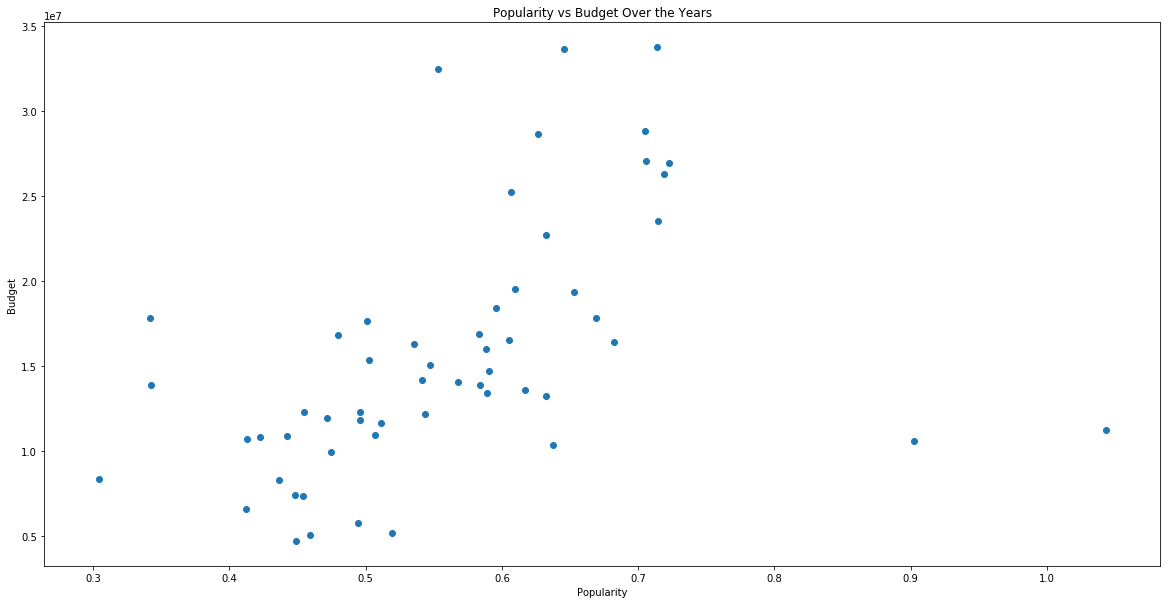

In [25]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(x=df_year['popularity'], y=df_year['budget_adj'])
plt.xlabel('Popularity')
plt.ylabel('Budget')
plt.title('Popularity vs Budget Over the Years')
plt.show();


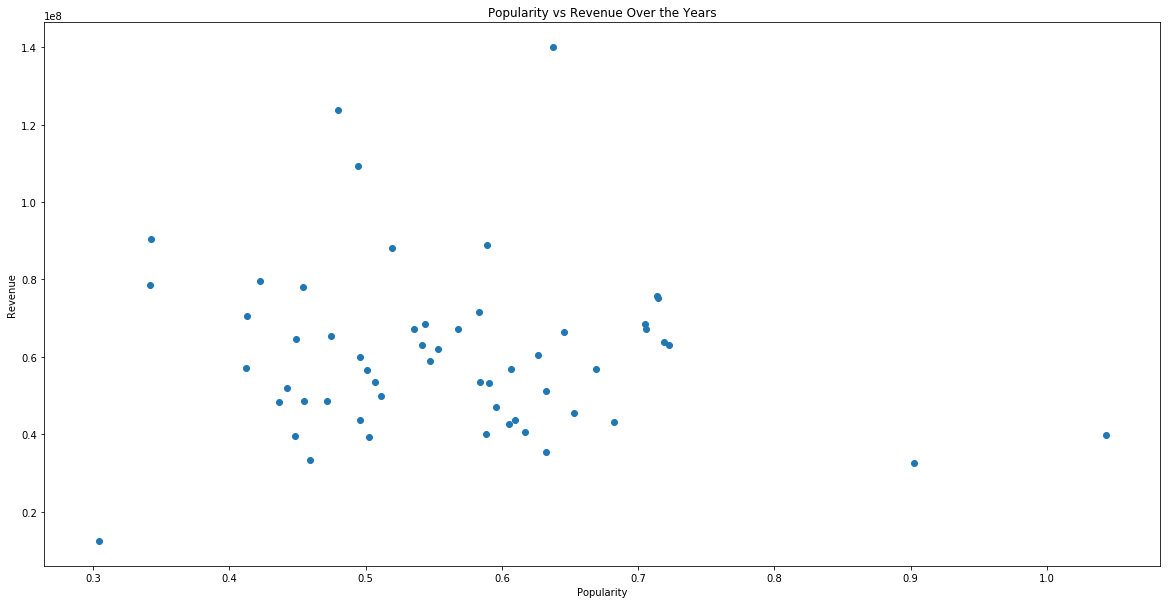

In [26]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(x=df_year['popularity'], y=df_year['revenue_adj'])
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Popularity vs Revenue Over the Years')
plt.show();

<a id='q2'></a>
>>## Research question 2

>>#### Note:  *** Revenue is the total amount of income generated by the sale of goods or services related to the company's primary operations; However, Gross profit is revenue minus the cost of goods sold ***


>><ul>
    <li> <a href="#budget_vs_revenue">** how do budget and revenue change overtime ? ** </a>
    <li> <a href='#revenue_factors'> ** What features do affect revenue ?** </a>
    <ul>

<a id ='budget_vs_revenue'></a>
>>## Budget VS Revenue over decads

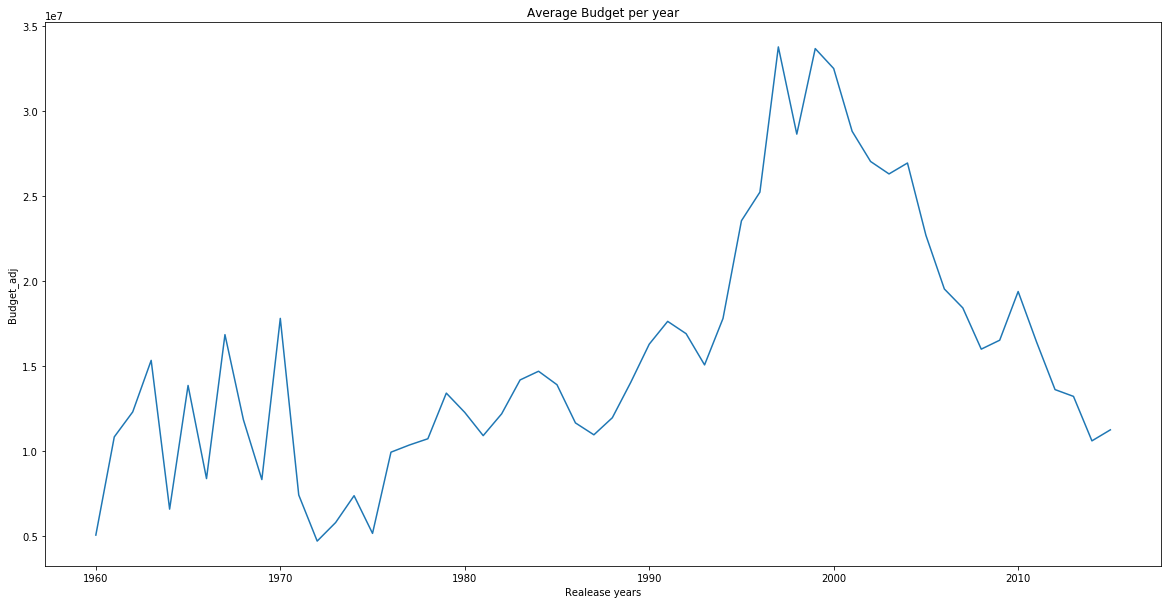

In [27]:
df_year['budget_adj'].plot(figsize=(20,10))
plt.xlabel('Realease years')
plt.ylabel('Budget_adj')
plt.title('Average Budget per year')
plt.show();

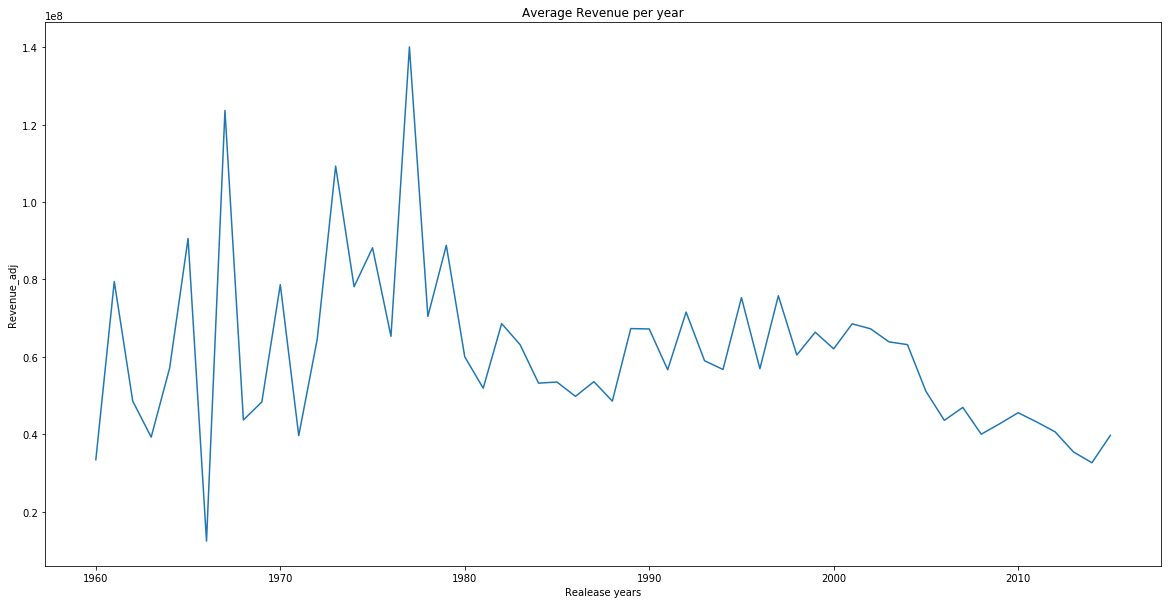

In [28]:
df_year['revenue_adj'].plot(figsize=(20,10))
plt.xlabel('Realease years')
plt.ylabel('Revenue_adj')
plt.title('Average Revenue per year');
plt.show();


>> ### Calculating how many films successed to do so we have to calculate the diff between the revenue and budget if the the result is positive so the film is successed otherwise it lost.! 


In [29]:
#Categorizing the films according the difference between revenue and budget
df['status'] = np.where(df['budget_adj'] <= df['revenue_adj'], 'success', 'lost')
df.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,status
0,135397,32.985763,150000000,1513528810,Jurassic World,"Chris-Pratt,Bryce-Dallas-Howard,Irrfan-Khan,Vi...",124,"Action,Adventure,Science-Fiction,Thriller",5562,6.5,2015,1.379999e+08,1.392446e+09,success
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,"Tom-Hardy,Charlize-Theron,Hugh-Keays-Byrne,Nic...",120,"Action,Adventure,Science-Fiction,Thriller",6185,7.1,2015,1.379999e+08,3.481613e+08,success
2,262500,13.112507,110000000,295238201,Insurgent,"Shailene-Woodley,Theo-James,Kate-Winslet,Ansel...",119,"Adventure,Science-Fiction,Thriller",2480,6.3,2015,1.012000e+08,2.716190e+08,success
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"Harrison-Ford,Mark-Hamill,Carrie-Fisher,Adam-D...",136,"Action,Adventure,Science-Fiction,Fantasy",5292,7.5,2015,1.839999e+08,1.902723e+09,success
4,168259,9.335014,190000000,1506249360,Furious 7,"Vin-Diesel,Paul-Walker,Jason-Statham,Michelle-...",137,"Action,Crime,Thriller",2947,7.3,2015,1.747999e+08,1.385749e+09,success


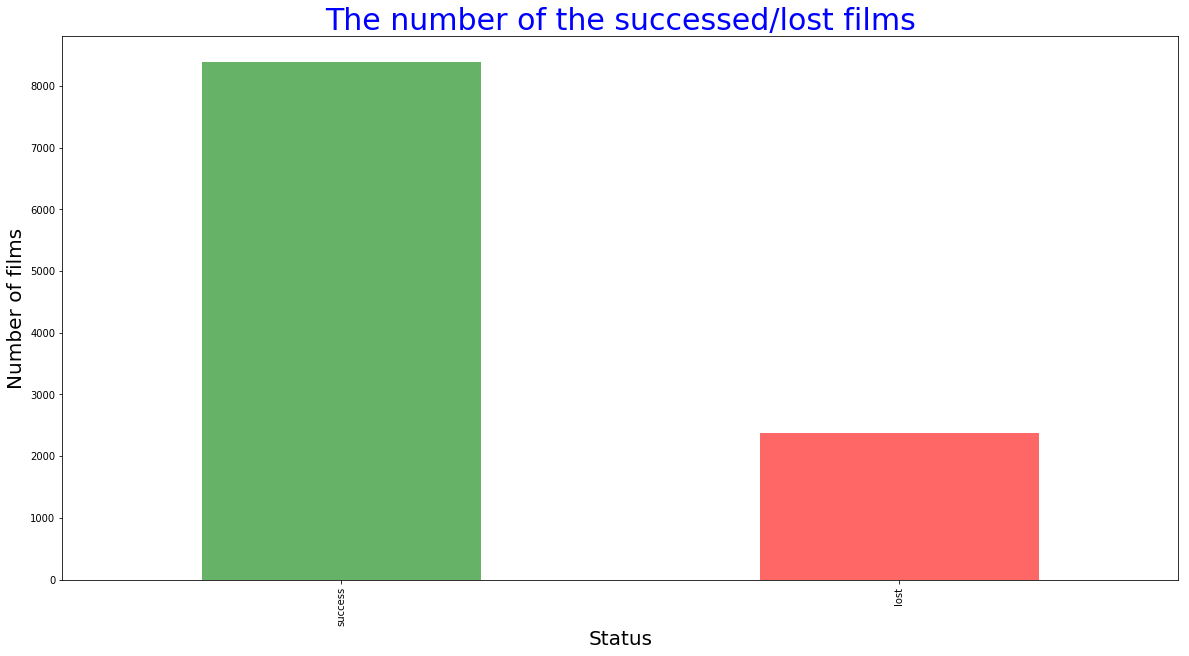

In [30]:
# Plotting the above numbers

df['status'].value_counts().plot(kind='bar',color=['green','red'],alpha=0.6)
plt.title('The number of the successed/lost films',fontsize=30,color='b')
plt.xlabel('Status',fontsize=20)
plt.ylabel('Number of films' ,fontsize=20)
plt.show();

In [31]:
#total_number of films we have and what is the probability of them.
tot_num=df['status'].describe()['count']

success=df['status'].value_counts()['success']
lost=df['status'].value_counts()['lost']

success_prob = (success/tot_num)*100
lost_prob    = (lost/tot_num)*100

#df['status'].value_counts()

print("\t\t  We have {} films".format(tot_num))
print('\tSuccess: {}\t\twith probability:  {}%'.format(success,success_prob))
print('\tLost:    {}\t\twith probability:  {}%'.format(lost,lost_prob))

		  We have 10767 films
	Success: 8390		with probability:  77.92328410885112%
	Lost:    2377		with probability:  22.076715891148883%


** OHHHHHH!!.. We have a kind of big proability of lost films with a huge budget and small revenue that leads no only no profit but also the budget exceeds the amout of revenue **

In [32]:
# Showing how the above probability is distribuited among decades 
success_loss = df.groupby('release_year').status.value_counts()
success_loss_df = pd.DataFrame(success_loss)
success_loss_df.head(10)

status
release_year status         
1960         success      28
             lost          4
1961         success      27
             lost          4
1962         success      25
             lost          7
1963         success      28
             lost          6
1964         success      38
             lost          4

In [33]:
# Getting the probability of success and lost films of each year over the decads 
# to see if the number of lost films are decreasing or increasing in order to imprpove
# our productivity.

(df.groupby('release_year').status.value_counts()/df.groupby('release_year').id.count()).head(10)

release_year  status 
1960          success    0.875000
              lost       0.125000
1961          success    0.870968
              lost       0.129032
1962          success    0.781250
              lost       0.218750
1963          success    0.823529
              lost       0.176471
1964          success    0.904762
              lost       0.095238
dtype: float64

In [34]:
success_loss_s = round((df.groupby('release_year').status.value_counts()/df.groupby('release_year').id.count())*100,2)

In [35]:
success_loss_prop_df=pd.DataFrame(success_loss_s).unstack()
success_loss_prop_df.columns=['loss_rate','success_rate']
success_loss_prop_df.head(10)

,loss_rate,success_rate
release_year,,
1960,12.50,87.50
1961,12.90,87.10
1962,21.88,78.12
1963,17.65,82.35
1964,9.52,90.48
1965,20.00,80.00
1966,15.22,84.78
1967,15.38,84.62
1968,18.42,81.58


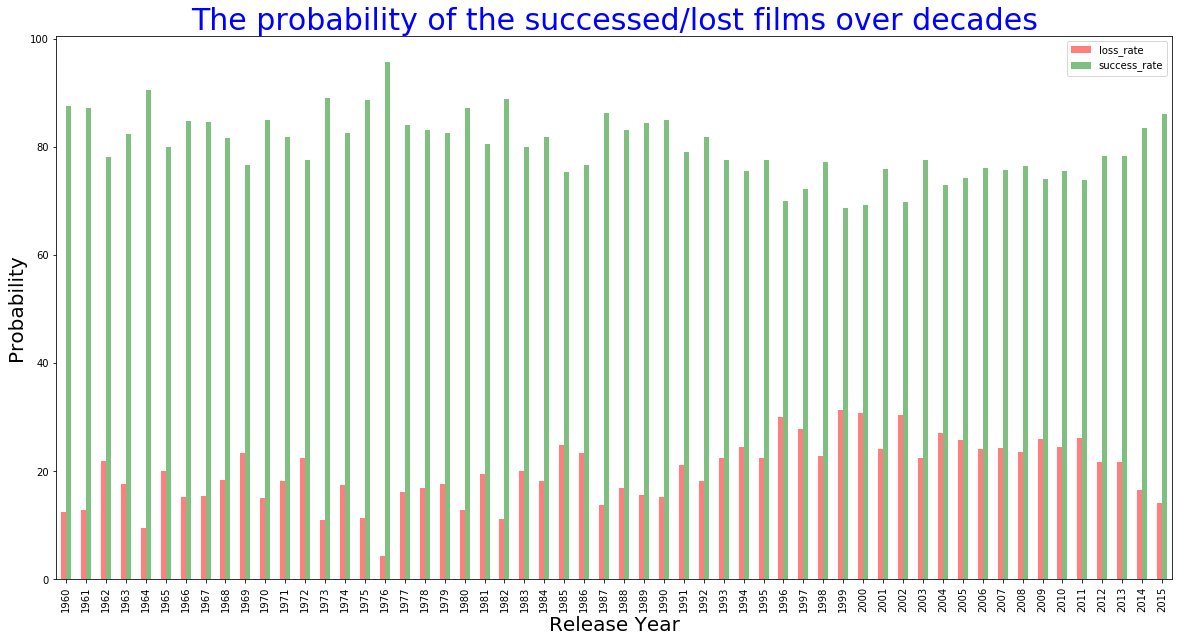

In [36]:
# Plotting this probability.
success_loss_prop_df.plot(kind='bar',color=['r','g'],alpha=0.5)
plt.title('The probability of the successed/lost films over decades',fontsize=30,color='b')
plt.xlabel('Release Year',fontsize=20)
plt.ylabel('Probability' ,fontsize=20)
plt.show();

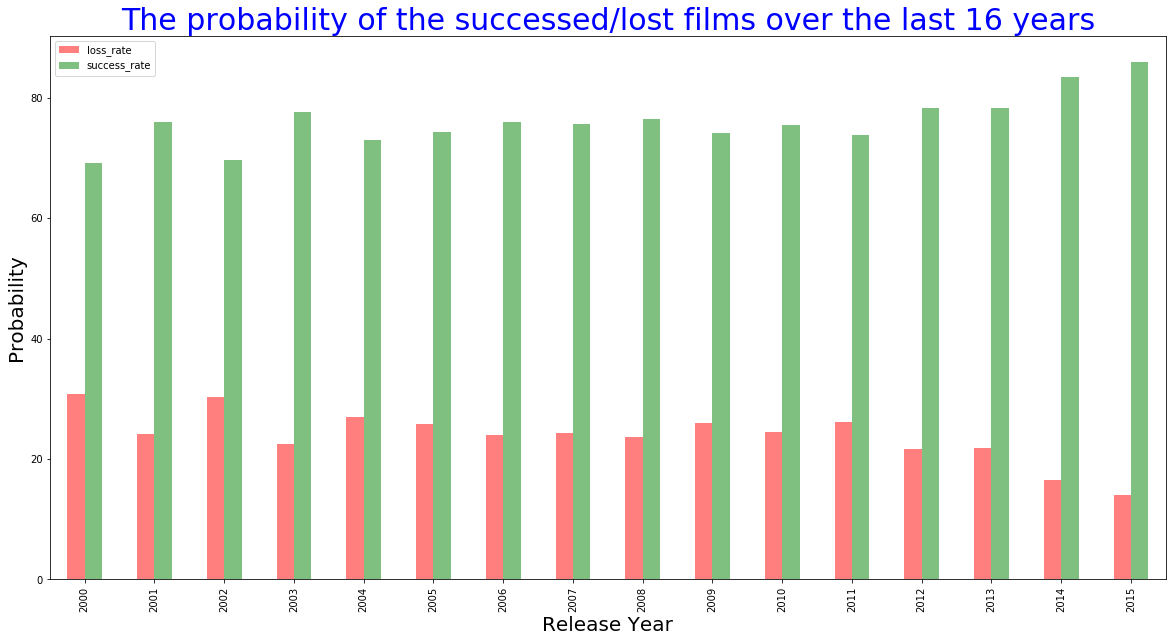

In [37]:
# Oh the above visulization is too messy so i decided to plot it again but with last 16 years because currently
# that is what i am interested in 

success_loss_prop_df.iloc[-16:].plot(kind='bar',color=['r','g'],alpha=0.5)
plt.title('The probability of the successed/lost films over the last 16 years',fontsize=30,color='b')
plt.xlabel('Release Year',fontsize=20)
plt.ylabel('Probability' ,fontsize=20)
plt.show();

<a id ='revenue_factors'></a>
>>## Revenue factors

In [38]:
# let's sperate the succes and lost films out of our original dataframe in order to do some visiual 
# explortation stuff on it
success_df=df[df['status'] == 'success'].reset_index(drop=True)
success_df.head()



,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,status
0,135397,32.985763,150000000,1513528810,Jurassic World,"Chris-Pratt,Bryce-Dallas-Howard,Irrfan-Khan,Vi...",124,"Action,Adventure,Science-Fiction,Thriller",5562,6.5,2015,1.379999e+08,1.392446e+09,success
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,"Tom-Hardy,Charlize-Theron,Hugh-Keays-Byrne,Nic...",120,"Action,Adventure,Science-Fiction,Thriller",6185,7.1,2015,1.379999e+08,3.481613e+08,success
2,262500,13.112507,110000000,295238201,Insurgent,"Shailene-Woodley,Theo-James,Kate-Winslet,Ansel...",119,"Adventure,Science-Fiction,Thriller",2480,6.3,2015,1.012000e+08,2.716190e+08,success
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"Harrison-Ford,Mark-Hamill,Carrie-Fisher,Adam-D...",136,"Action,Adventure,Science-Fiction,Fantasy",5292,7.5,2015,1.839999e+08,1.902723e+09,success
4,168259,9.335014,190000000,1506249360,Furious 7,"Vin-Diesel,Paul-Walker,Jason-Statham,Michelle-...",137,"Action,Crime,Thriller",2947,7.3,2015,1.747999e+08,1.385749e+09,success


In [39]:
lost_df=df[df['status'] == 'lost'].reset_index(drop=True)
lost_df.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,status
0,265208,2.932340,30000000,0,Wild Card,"Jason-Statham,Michael-Angarano,Milo-Ventimigli...",92,"Thriller,Crime,Drama",481,5.3,2015,2.759999e+07,0.000000e+00,lost
1,210860,2.575711,60000000,30418560,Mortdecai,"Johnny-Depp,Gwyneth-Paltrow,Ewan-McGregor,Paul...",106,"Comedy,Adventure",696,5.3,2015,5.519998e+07,2.798506e+07,lost
2,201088,2.550747,70000000,17752940,Blackhat,"Chris-Hemsworth,Leehom-Wang,Tang-Wei,Viola-Dav...",133,"Mystery,Crime,Action,Thriller,Drama",584,5.0,2015,6.439997e+07,1.633270e+07,lost
3,205775,2.345821,100000000,93820758,In the Heart of the Sea,"Chris-Hemsworth,Benjamin-Walker,Cillian-Murphy...",122,"Thriller,Drama,Adventure,Action,History",805,6.4,2015,9.199996e+07,8.631506e+07,lost
4,334074,2.331636,20000000,0,Survivor,"Pierce-Brosnan,Milla-Jovovich,Dylan-McDermott,...",96,"Crime,Thriller,Action",280,5.4,2015,1.839999e+07,0.000000e+00,lost


>>### Does the genres have an impact on the status of films?

In [40]:
s1 = success_df.genres.str.split(',', expand=True).stack().reset_index( level=1,drop=True)
s2 = success_df['status'].reset_index(level=1, drop=True)

success_pie  = pd.concat([s1,s2], axis=1, keys=['category','status'])
success_pie.head(10)

,category,status
0,Action,success
0,Adventure,success
0,Science-Fiction,success
0,Thriller,success
1,Action,success
1,Adventure,success
1,Science-Fiction,success
1,Thriller,success
2,Adventure,success
2,Science-Fiction,success


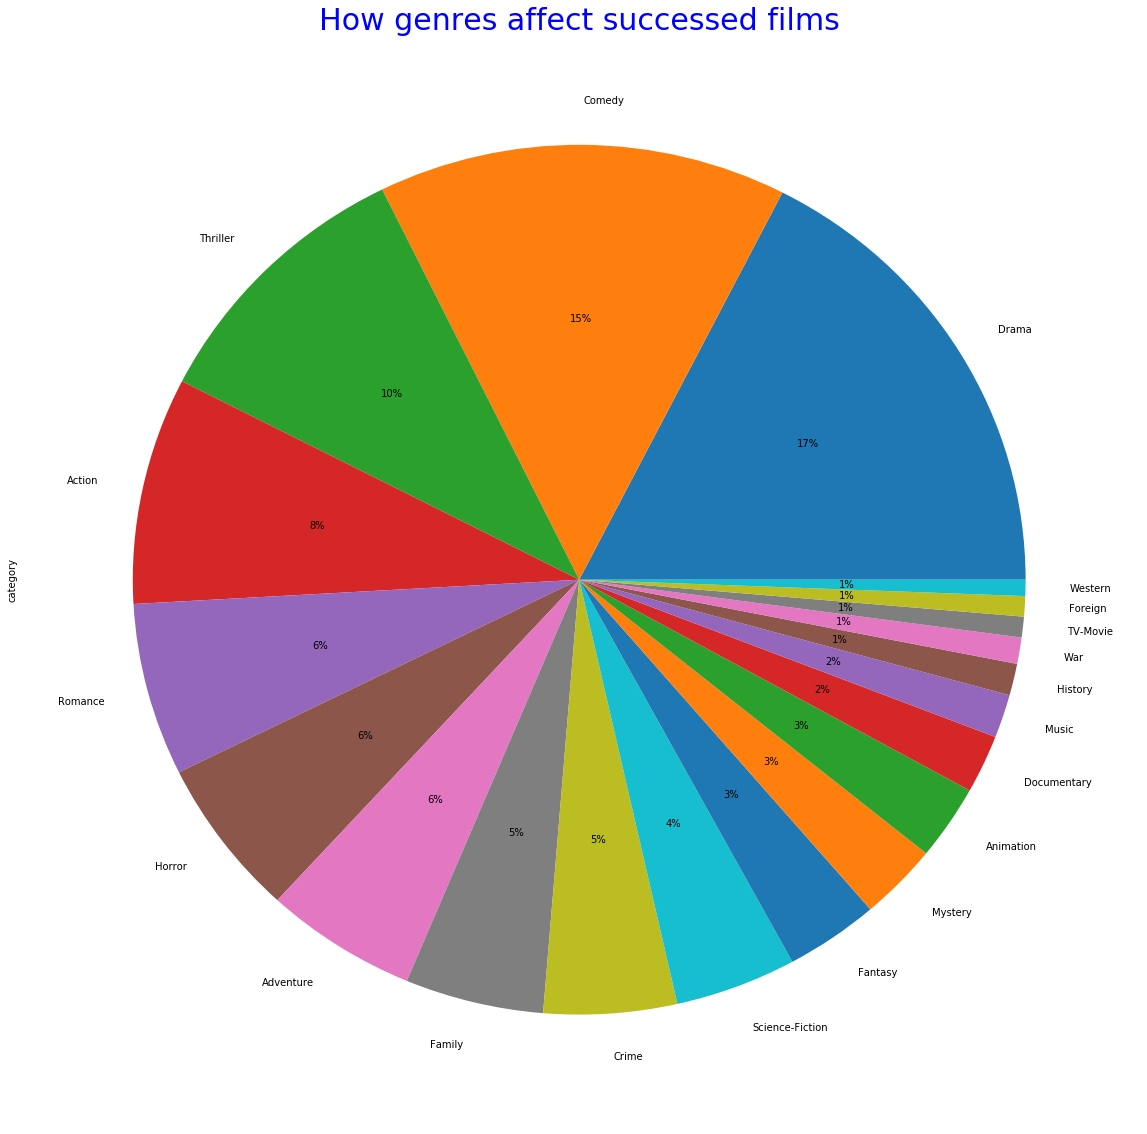

In [41]:
success_pie.category.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(20,20))
plt.title('How genres affect successed films',fontsize=30,color='b')
plt.show();

In [42]:
s1 = lost_df.genres.str.split(',', expand=True).stack().reset_index( level=1,drop=True)
s2 = lost_df['status'].reset_index(level=1, drop=True)

lost_pie  = pd.concat([s1,s2], axis=1, keys=['category','status'])
lost_pie.head(10)

,category,status
0,Thriller,lost
0,Crime,lost
0,Drama,lost
1,Comedy,lost
1,Adventure,lost
2,Mystery,lost
2,Crime,lost
2,Action,lost
2,Thriller,lost
2,Drama,lost


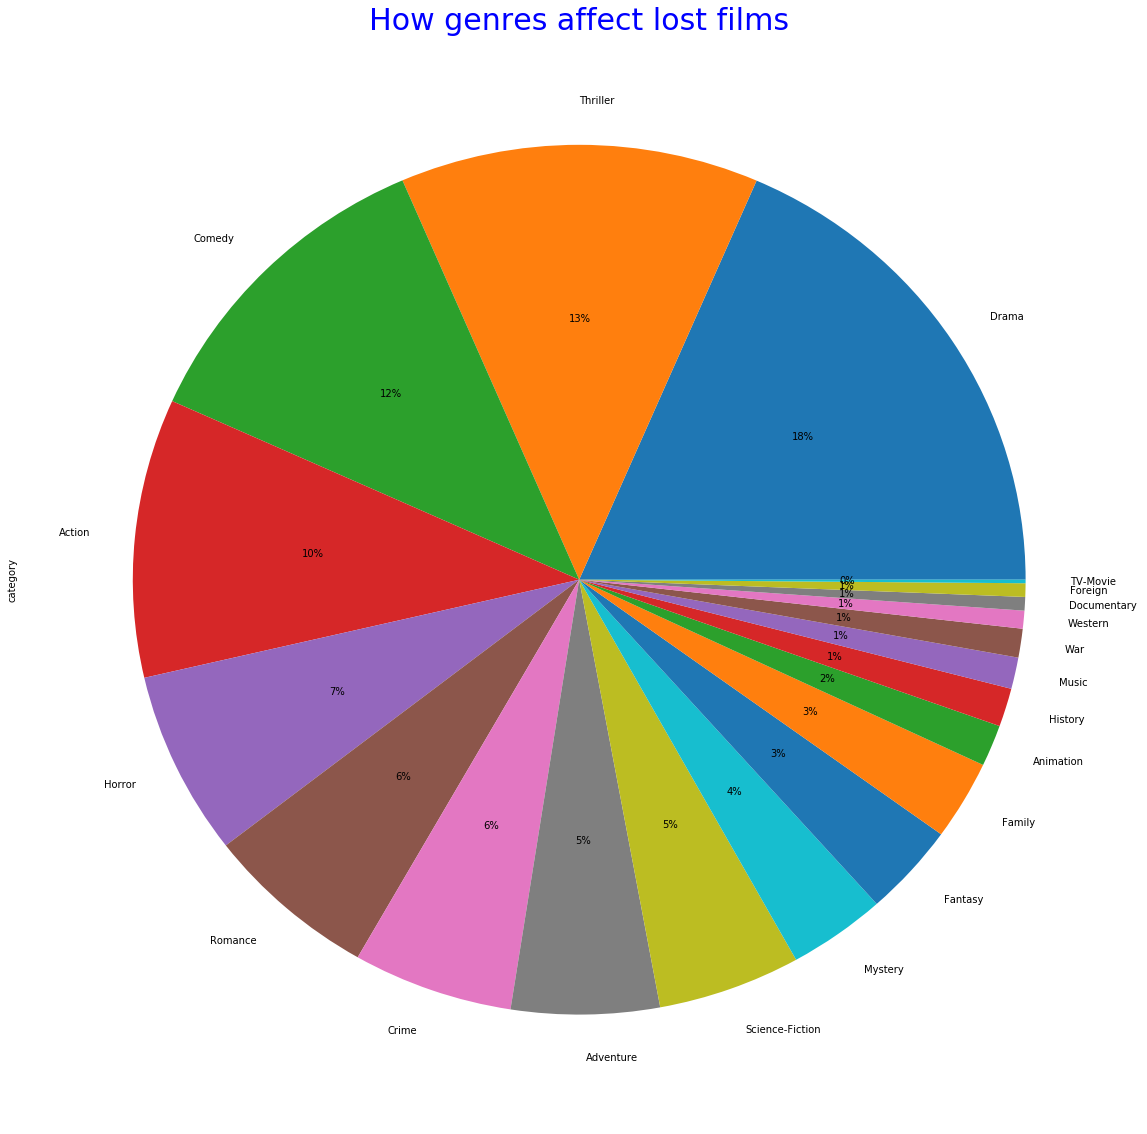

In [43]:
lost_pie.category.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(20,20))
plt.title('How genres affect lost films',fontsize=30,color='b')
plt.show();

>### Does the money as usual have the upper hand of success on any work ? 
> Lets see the budget and revenue of success films aganit the non-succefull films over the last 16 years

In [44]:
lost_df[['budget_adj','revenue_adj']].describe()

,budget_adj,revenue_adj
count,2.377000e+03,2.377000e+03
mean,2.456188e+07,8.344043e+06
std,2.973309e+07,1.810499e+07
min,9.210911e-01,0.000000e+00
25%,4.680167e+06,0.000000e+00
50%,1.346299e+07,0.000000e+00
75%,3.349690e+07,8.007773e+06
max,4.250000e+08,1.819387e+08


In [45]:
success_df[['budget_adj','revenue_adj']].describe()

,budget_adj,revenue_adj
count,8.390000e+03,8.390000e+03
mean,1.576499e+07,6.415449e+07
std,3.540129e+07,1.621140e+08
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,1.382598e+07,5.628056e+07
max,3.683713e+08,2.827124e+09


In [46]:
success_budget = success_df.groupby(['release_year'])['budget_adj','revenue_adj','runtime'].mean().loc[2000:2015]
success_budget_df = pd.DataFrame({'revenue_adj':success_budget.revenue_adj,'budget_adj':success_budget.budget_adj,'runtime':success_budget.runtime},index=success_budget.index)
success_budget_df


,budget_adj,revenue_adj,runtime
release_year,,,
2000,2.890496e+07,8.382264e+07,102.954839
2001,2.507578e+07,8.439717e+07,109.065574
2002,2.409396e+07,9.007329e+07,109.532609
2003,2.433219e+07,7.933573e+07,99.266055
2004,2.456726e+07,8.037331e+07,105.415179
2005,2.120427e+07,6.434613e+07,102.761194
2006,1.780723e+07,5.390796e+07,102.583062
2007,1.762060e+07,5.960726e+07,100.161094
2008,1.549848e+07,5.030709e+07,100.271277


In [47]:
lost_budget = lost_df.groupby(['release_year'])['budget_adj','revenue_adj','runtime'].mean().loc[2000:2015]
lost_budget_df = pd.DataFrame({'revenue_adj':lost_budget.revenue_adj,'budget_adj':lost_budget.budget_adj,'runtime':lost_budget.runtime},index=lost_budget.index)
lost_budget_df

,budget_adj,revenue_adj,runtime
release_year,,,
2000,4.064247e+07,1.318453e+07,108.362319
2001,4.067446e+07,1.844269e+07,104.741379
2002,3.386149e+07,1.472991e+07,101.075000
2003,3.320659e+07,1.030107e+07,105.571429
2004,3.343011e+07,1.667386e+07,105.228916
2005,2.705911e+07,1.287452e+07,105.559140
2006,2.508833e+07,1.087857e+07,102.546392
2007,2.099568e+07,7.583470e+06,100.764151
2008,1.769981e+07,6.592186e+06,101.224138


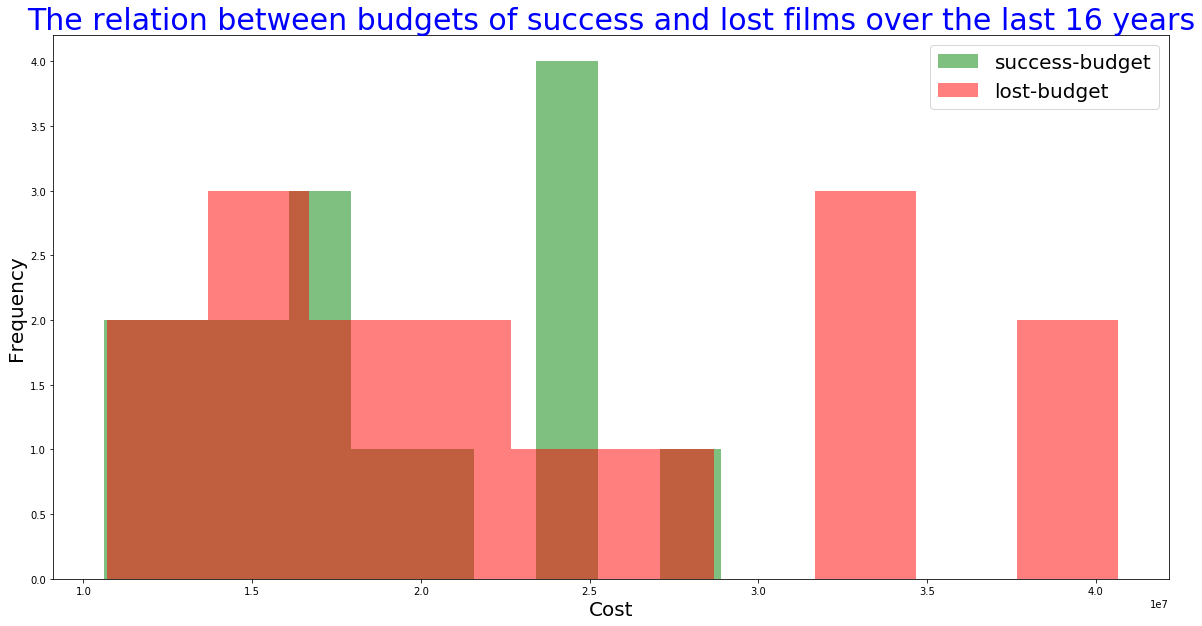

In [48]:
fig,ax = plt.subplots(figsize=(20,10))
ax.hist(success_budget_df['budget_adj'],color='green',label='success-budget',alpha=0.5)
ax.hist(lost_budget_df['budget_adj'],color = 'red',label='lost-budget',alpha=0.5)
plt.title('The relation between budgets of success and lost films over the last 16 years',fontsize=30,color='b')
plt.legend(loc ='upper right',fontsize=20)
plt.xlabel('Cost',fontsize=20)
plt.ylabel('Frequency' ,fontsize=20)
plt.show();

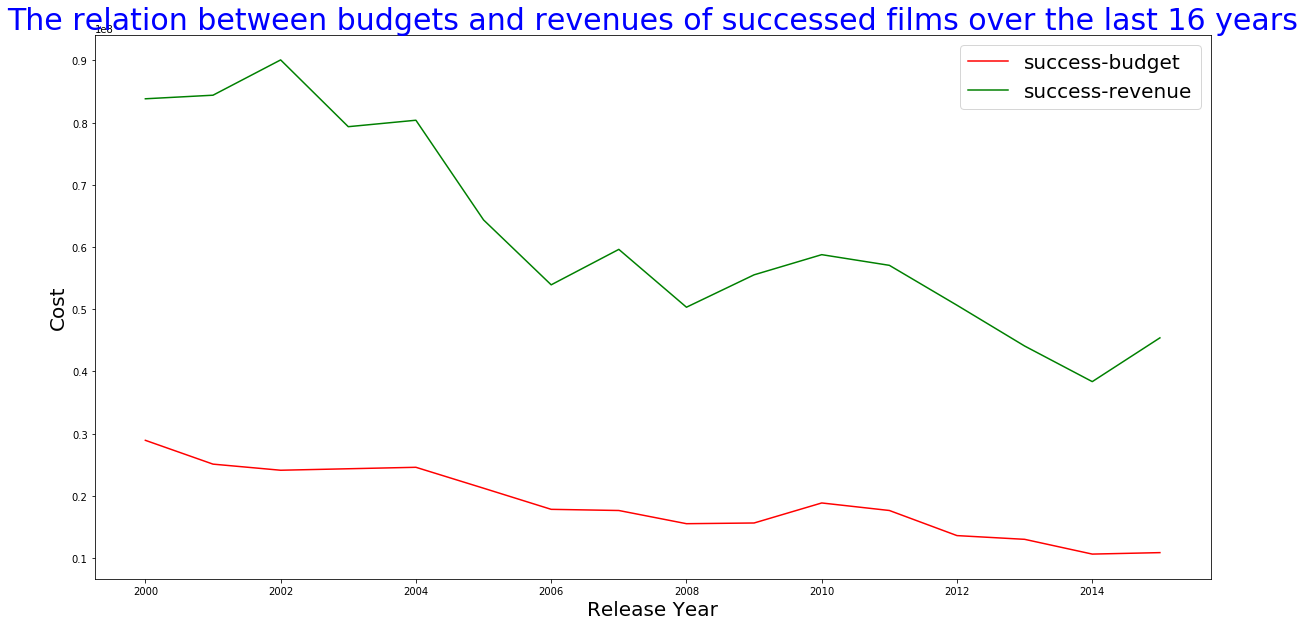

In [49]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(success_budget_df.index,success_budget_df.budget_adj,label='success-budget',color='r')
plt.plot(success_budget_df.index,success_budget_df.revenue_adj,label='success-revenue',color='g')
plt.legend(loc ='upper right',fontsize=20)
plt.title('The relation between budgets and revenues of successed films over the last 16 years',fontsize=30,color='b')
plt.xlabel('Release Year',fontsize=20)
plt.ylabel('Cost' ,fontsize=20)
plt.show();

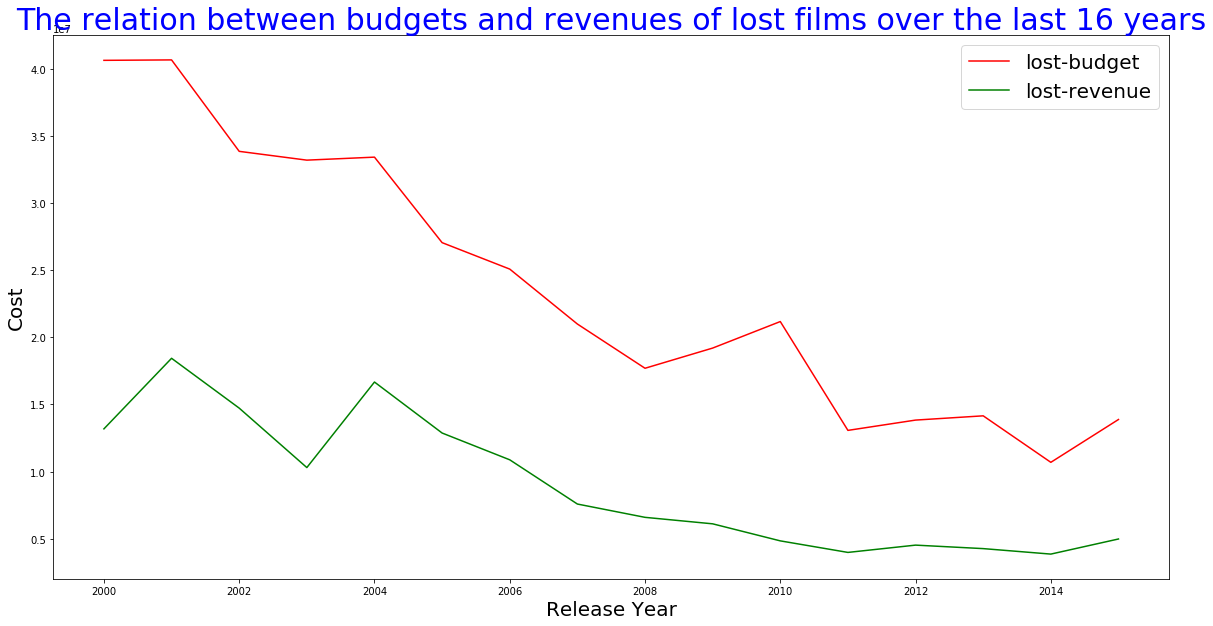

In [50]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(lost_budget_df.index,lost_budget_df.budget_adj,label='lost-budget',color='r')
plt.plot(lost_budget_df.index,lost_budget_df.revenue_adj,label='lost-revenue',color='g')
plt.legend(loc ='upper right',fontsize=20)
plt.title('The relation between budgets and revenues of lost films over the last 16 years',fontsize=30,color='b')
plt.xlabel('Release Year',fontsize=20)
plt.ylabel('Cost' ,fontsize=20)
plt.show();

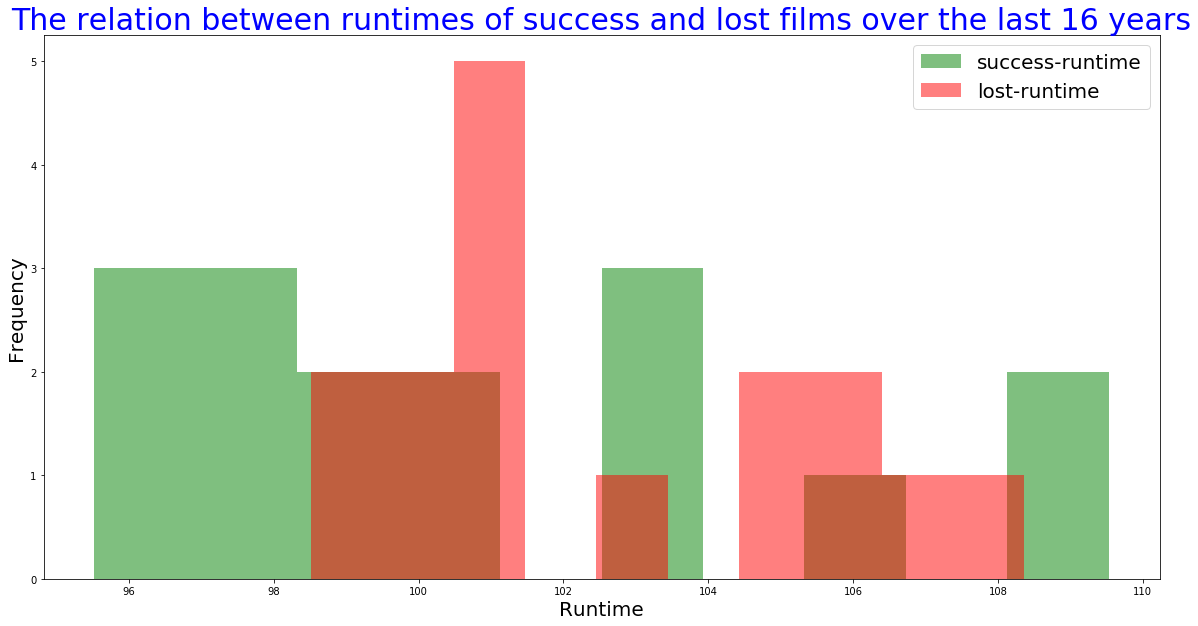

In [51]:
fig,ax = plt.subplots(figsize=(20,10))
ax.hist(success_budget_df['runtime'],color='green',label='success-runtime',alpha=0.5)
ax.hist(lost_budget_df['runtime'],color = 'red',label='lost-runtime',alpha=0.5)
plt.title('The relation between runtimes of success and lost films over the last 16 years',fontsize=30,color='b')
plt.legend(loc ='upper right',fontsize=20)
plt.xlabel('Runtime',fontsize=20)
plt.ylabel('Frequency' ,fontsize=20)
plt.show();

<a id='conclusions'></a>
## Conclusions
>**Tip:** Finally, summarize findings and the results that have been performed. 
<ul>
    <li><a href = "#q1" >**Research Quesiton 1 **:</a>
    <ul>
    <li>We can find that Drama,Comedy, and Thriller are the most common genres while in combination Romance and Documentry did add a huge impact in the porducation of films
    <li>In the past decades, We found that the runtime of films are so big that could seem that the films are so boring so in nowdays,since 2000, the runtime declined from 108 to 98 mins that are the least runtime of films over the all decades
    <li>The most popular fims have reveune between o.3+1e8 to 0.8+1e8
    <li>Money not always talks.Apparenlty in how the films are popular, money doesn't always influence how popular the films will be since the budget of theses films ranges from 0.5+1e7 to 2+1e7,as **MAX VALUE**
    </ul>
    <li><a href = "#q2" >**Research Quesiton 2 **:</a>
    <ul>
    <li>As the life goes expensive as usua also the budget of films do whenever it reaches the budget_adj increase from 1990 too 2000,where is it reaches its peak, and then decreased to reach a good ending point at 2015 
    <li>Having 22% films as lost ones are not so good,Filmmaking is not taking care of this precentatge since the most of it is occurred at the last 15 years because when we look at `The probability of the successed/lost films over decades` **graph** you can detect that the number of the lost films are much more than those in the first decades
    <li>Genres of films don't affect the status of the film
    <li>Budget of both status of films are almost the same but there is a difference that in successful films the max budget that is used is almost 2.8+1e7 while in the lost films they used a huget number that is more than that which could reach to 4+1e7; **We can conclude** that the naive way of thinking, while filmmaking, that is the more you spend the successful film you will get **DOESN'T WORK**
    <li>Runtime of films is not a factor in status detection also
    </ul>
</ul>

> ## Limitations: 
 
><ul>
    <li>Most of the datasets have quite a number of missing datas because we couldn't know why some films have a huge success even they are low budget and that leadas to the disability to make a machine learning recommendation system to filmmaking factories.
     <li>Couldn't know what kinds of films that any factory could make will lead to succes, not even huge one, due to the exact genres with both lost and successed films 
</ul>

In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'TMDb-anaylsis.ipynb'])

0